# MCMC and the Metropolis-Hastings Algorithm

> This tutorial gives a brief introduction to Approximate Bayesian Inference via Markov Chain Monte Carlo.
> 
> Author: Bjarne C. Hiller

## The Observation

Great, we just made a new observation $x$!
We know, that $x$ was generated by process that involves another variable $z$.
Unfortunately, we cannot observe $z$ directly - it is hidden (latent).
Can we *infer* some information about the latent variable $z$ from the observation $x$ we made?

Yes, using probability theory and *Bayes' law*, we know that:

$$
    \underbrace{p(z|x)}_\text{posterior} = \frac{ \overbrace{p(x|z)}^\text{likelihood} \cdot \overbrace{p(z)}^\text{prior}}{ \underbrace{p(x)}_\text{evidence}}
$$

We are interested in the probability distribution $p(z|x)$, i.e., the probability of $z$, *posterior* to observing $x$.
This problem is known as *Bayesian inference*.

Alright, the equation seems straightforward enough - so, where is the catch?

## The Catch

Let's say we just define the distribution $p(z)$ from our assumptions *prior* to observing $x$ - a uniform distribution seems reasonable enough!
Then, we describe the process which generates $x$ from $z$, providing us implicitly with $p(x|z)$: information, how *likely* $x$ is given $z$.

But now it get's tricky: How do we actually know the probability of observing *evidence* $x$? We could observe some more instantiations of $x$, and estimate the density of $x$. But depending on the density and structure of $x$, it could require a ton of observations to guarantee that we accurately estimated the density even for very rare events.

Alternatively, we could just compute $p(x)$ from the likelihood and the prior, which we already have - because we defined them ourselves. How convenient!

Using the definition of conditional probabilites, for a single discrete variable $p(z)$ with $i$ possible values, Bayes' Law then would transform into:

$$
    p(z|x) = \frac{p(x|z) \cdot p(z)}{\color{red}p(x)}
    = \frac{p(x|z) \cdot p(z)}{ \color{red} \sum_i p(x|z_i) p(z_i)}
$$

Great, so this is something we could just compute by iterating over z and summing up the individual values!

However, if we're dealing with a latent *continuous random variable* $z$, i.e., with values from a continuous domain, we need to put more effort in and integrate over $z$ instead.
Additionally, we might be even looking at a vector of latent variables latent variables $\bm{z}=[z_1, z_2, ..., z_k]^T$, which results in ugly, nested integrals...

Then, the computation becomes *intractible*. Or, simply put: it takes very, *very* long.

$$
    p(z|x) = \frac{p(x|z) \cdot p(z)}{\color{red}p(x)}
    = \frac{p(x|z) \cdot p(z)}{ \color{red}\underbrace{ \int{ p(x|z) p(z)}dz}_\text{intractible!}}
$$

## The Solution

Since we are very, *very* impatient, we don't want to wait for our inferred posterior probability $p(z|x)$.
Maybe, we don't actually need the result to be *too* accurate - then, we can sacrifice precision against speed!

This is known as *Approximate Bayesian Inferrence*, and historically, there are two main approaches to it:

### 1. Variational Inference (cool: VI)

Variational Inference methods usually restricts the posterior to be a distribution from a family of probability distributions - for example, a Normal distribution. This reduces the problem from computing the density $p(z|x)$ on the complete domain to just estimating the parameters (like mean and variance) of the posterior distribution. Usually, the parameters are optimized by maximizing an objective function, like the *Evidence Lower Bound* (cool: ELBO), e.g., via gradient descent. Since those methods perform inference by finding the maximum of an objective function, they are called *variational* (see [calculus of variations](https://en.wikipedia.org/wiki/Calculus_of_variations)). You might have also already heard of *Variational Autoencoders*? Their latent representations describe parameters of a posterior distribution, so the encoder actually learns to perform Variational Inference.

### 2. Markov Chain Monte Carlo (cool: MCMC)

A *Monte Carlo* algorithm usually finds an approximation of the result by sampling from a random process.
The name *Monte Carlo* was introduced by [Stanisław Ulam](https://en.wikipedia.org/wiki/Stanis%C5%82aw_Ulam), referencing the Monte Carlo Casino in Monaco and the gambling nature of the algorithm.
Similarly, Markov Chain Monte Carlo algorithms approximate a distribution by repeatly taking random steps in a Markov Chain.
The approximation of the density usually becomes more accurate with the number of steps, i.e., the length of the chain.
Therefore, MCMC allows sampling from probability distributions, even if the density function of the distribution itself isn't known.

MCMC methods can be used for Approximate Bayesian Inference by sampling from the posterior distribution.



In the remainder of this tutorial, we will implement a simple version of the *Metropolis-Hastings Algorithm*, which allows us to sample from the posterior distribution.

## Implementation

### Metropolis-Hastings Algorithm

We will start by implementing the *Metropolis-Hastings Algorithm*.
We need:

1. a function $f$ that is proportional to the true density $P$: $f(x) \propto P(x)$
2. A proposal density $g(x|y)$


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


rng = np.random.default_rng(19)


In [22]:
# 1. generate latent variables z from a more complex distribution

# 2. generate x via a sampling process


# 3. perform monte carlo markov chain to infer x


def mh(prior, likelihood, sampling):
    pass

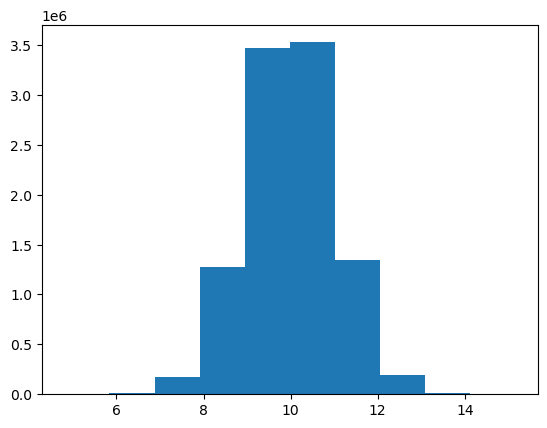

In [20]:
x = rng.normal(10, size=10000000)

plt.hist(x);

### Performing Approximate Bayesian Inference with MCMC

## References

### Links

- https://en.wikipedia.org/wiki/Calculus_of_variations
- https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm
- https://pyro.ai/examples/intro_long.html

### Papers

- [Hoffman et al.: Stochastic Variational Inference (2013)](https://doi.org/10.48550/arXiv.1206.7051)
- [Kingma and Welling: Auto-Encoding Variational Bayes (2022)](https://doi.org/10.48550/arXiv.1312.6114)
- [Metropolis et al.: Equation of State Calculations by Fast Computing Machines (1953)](https://doi.org/10.2172/4390578)

### Bibliography

```bib
@techreport{osti_4390578,
  author       = {Metropolis, Nicholas and Rosenbluth, Arianna W. and Rosenbluth, Marshall N. and Teller, Augusta H. and Teller, Edward},
  title        = {Equation of state calculations by fast computing machines},
  institution  = {Los Alamos Scientific Lab., Los Alamos, NM (United States); Univ. of Chicago, IL (United States)},
  annote       = {},
  doi          = {10.2172/4390578},
  url          = {https://www.osti.gov/biblio/4390578},
  place        = {United States},
  year         = {1953},
  month        = {03}
}

@misc{hoffman2013stochasticvariationalinference,
      title={Stochastic Variational Inference}, 
      author={Matt Hoffman and David M. Blei and Chong Wang and John Paisley},
      year={2013},
      eprint={1206.7051},
      archivePrefix={arXiv},
      primaryClass={stat.ML},
url={https://arxiv.org/abs/1206.7051}, 
}

@misc{kingma2022autoencodingvariationalbayes,
      title={Auto-Encoding Variational Bayes}, 
      author={Diederik P Kingma and Max Welling},
      year={2022},
      eprint={1312.6114},
      archivePrefix={arXiv},
      primaryClass={stat.ML},
      url={https://arxiv.org/abs/1312.6114}, 
}
```